In [33]:
import pandas as pd

In [34]:
df=pd.read_csv('Data/collegePlace.csv')

In [35]:
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [36]:
df.shape


(2966, 8)

In [37]:
df['Gender'].replace({'Male':'1','Female':'0'},inplace=True)

In [38]:
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,1,Electronics And Communication,1,8,1,1,1
1,21,0,Computer Science,0,7,1,1,1
2,22,0,Information Technology,1,6,0,0,1
3,21,1,Information Technology,0,8,0,1,1
4,22,1,Mechanical,0,8,1,0,1


In [39]:
df['Stream'].unique()

array(['Electronics And Communication', 'Computer Science',
       'Information Technology', 'Mechanical', 'Electrical', 'Civil'],
      dtype=object)

In [40]:
df['Stream'].replace({'Electronics And Communication':'0','Computer Science':'1','Information Technology':'2','Mechanical':'3','Electrical':'4','Civil':'5'},inplace=True)

In [41]:
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,1,0,1,8,1,1,1
1,21,0,1,0,7,1,1,1
2,22,0,2,1,6,0,0,1
3,21,1,2,0,8,0,1,1
4,22,1,3,0,8,1,0,1


In [42]:
df.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

In [43]:
import matplotlib.pyplot as plt

In [44]:
age=df['Age']
stream=df['Stream']
internship=df['Internships']
cgpa=df['CGPA']
hostel=df['Hostel']
backlog=df['HistoryOfBacklogs']
Y=df['PlacedOrNot']

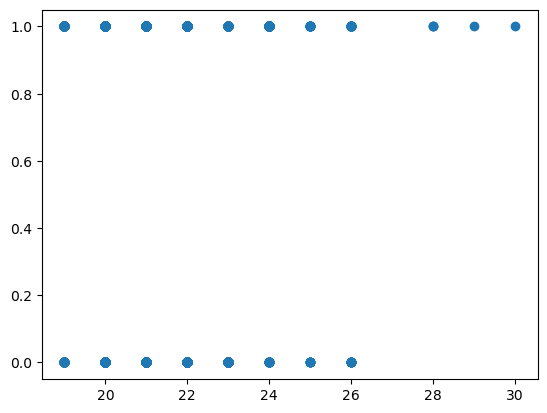

In [45]:
plt.scatter(age,Y)

In [46]:
Y = df["PlacedOrNot"]

In [47]:
X = df.drop(["PlacedOrNot"], axis=1)

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [50]:
from xgboost import XGBClassifier

In [51]:
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,1,0,1,8,1,1,1
1,21,0,1,0,7,1,1,1
2,22,0,2,1,6,0,0,1
3,21,1,2,0,8,0,1,1
4,22,1,3,0,8,1,0,1


In [52]:
from sklearn.preprocessing import LabelEncoder

In [53]:
label_encoders = {}
for column in ['Gender', 'Stream']:
    le = LabelEncoder()
    X_train[column] = le.fit_transform(X_train[column])
    label_encoders[column] = le

In [54]:
clf = XGBClassifier(learning_rate=0.09, n_estimators=150)
clf.fit(X_train, Y_train, eval_metric="logloss")

C:\Users\Shouvik\anaconda3\lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.09, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [55]:
type(stream[1])

str

In [56]:
gender = df['Gender']

In [57]:
type(stream[1])

str

In [58]:
type(gender[1])

str

In [59]:
for column in ['Gender', 'Stream']:
    X_test[column] = label_encoders[column].transform(X_test[column])

In [60]:
predictions = clf.predict(X_test)

In [61]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score

In [62]:
print("accuracy score : " + str(accuracy_score(Y_test, predictions)))

accuracy score : 0.8720538720538721


In [63]:
import joblib

In [64]:
joblib.dump(clf, 'xgb_model.pkl')

['xgb_model.pkl']